In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numerik import gradient_descent

In [34]:
# define model functions for pump problem
def p_stat(fluid_density, gravity, height):
    return fluid_density * gravity * height

def p_res(drag_coefficient, pipe_length, pipe_area, flow_rate, fluid_density):
    fluid_velocity = flow_rate / pipe_area
    return pipe_length * drag_coefficient * fluid_density / 2 * fluid_velocity**2

def p_pump(flow_rate, power):
    p0 = 1000000
    a = 4/27 * (p0**3)/((power-10e5)**2)
    b = p0 / 2
    return p0 - a * flow_rate**2 - b * flow_rate**3

[]

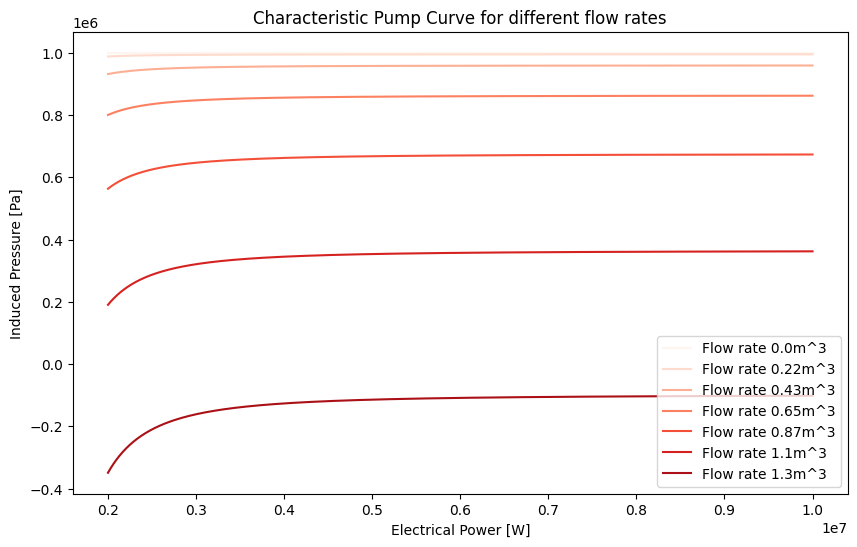

In [35]:
# plot pump induced pressure based on flow rate and power
plt.figure(figsize=(10,6))

powers = np.linspace(200, 1000, 1000) * 10e3
flow_rates = np.linspace(0, 1.3, 7)

red_cmap = matplotlib.colormaps["Reds"]

for i, fr in enumerate(flow_rates):
    pressures = p_pump(fr, powers)
    plt.plot(powers, pressures, label=f"Flow rate {fr:.2}m^3", color=red_cmap(i/len(flow_rates)))
    
plt.title("Characteristic Pump Curve for different flow rates")
plt.xlabel("Electrical Power [W]")
plt.ylabel("Induced Pressure [Pa]")
plt.legend(loc="lower right")

plt.plot()

As long as the induced pressure is positive we operate in the limits of the pump (at least theoretically).  As soon as we drop below a positive pressure we leave the operating range. This happens around a flow rate of 1.3m^3 regardless of the supplied power.

In [36]:
# calculate solution
fluid_density = 1000
height = 60
pipe_length = 500
pipe_area = 0.05
gravity = 9.81
drag_coefficient = 0.002
p0 = 10e6

def fitness_function(flow_rate, power):
    p_res1 = p_res(drag_coefficient, pipe_length, pipe_area, flow_rate, fluid_density)
    p_stat1 = p_stat(fluid_density, gravity, height)
    p_pump1 = p_pump(flow_rate, power)
    return p_pump1 - (p_res1 + p_stat1)

def fitness_function_jacobi(flow_rate, power):
    p_res1 = pipe_length * drag_coefficient * fluid_density * flow_rate / (pipe_area**2)
    p_pump1 = 4/27*p0**3/(power-10e5)**2*flow_rate*2-3*p0/2*flow_rate**2
    return np.array([[-p_pump1 - p_res1]])


def get_flow_rate(power):
    x0 = np.array([1])
    
    f = lambda p: fitness_function(p[0], power)
    df = lambda p: fitness_function_jacobi(p[0], power)
    
    pf = gradient_descent.newton(f, df, x0) 
    return pf

print(get_flow_rate(200 * 10e3))

IndexError: invalid index to scalar variable.